<a href="https://colab.research.google.com/github/JimKing100/nfl-test/blob/master/Prediction_Defense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

In [0]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [0]:
# Import data
original_df = pd.read_csv('https://raw.githubusercontent.com/JimKing100/nfl-test/master/data-actuals/actuals_defense.csv')

In [4]:
transpose_df = original_df.transpose()
transpose_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
player,SF,CHI,CIN,BUF,DEN,CLE,TB,ARI,LAC,KC,IND,DAL,MIA,PHI,ATL,NYG,JAC,NYJ,DET,GB,CAR,NE,OAK,LA,BAL,WAS,NO,SEA,PIT,HOU,TEN,MIN
first,San Francisco,Chicago,Cincinnati,Buffalo,Denver,Cleveland,Tampa Bay,Arizona,Los Angeles,Kansas City,Indianapolis,Dallas,Miami,Philadelphia,Atlanta,New York,Jacksonville,New York,Detroit,Green Bay,Carolina,New England,Oakland,Los Angeles,Baltimore,Washington,New Orleans,Seattle,Pittsburgh,Houston,Tennessee,Minnesota
last,49ers,Bears,Bengals,Bills,Broncos,Browns,Buccaneers,Cardinals,Chargers,Chiefs,Colts,Cowboys,Dolphins,Eagles,Falcons,Giants,Jaguars,Jets,Lions,Packers,Panthers,Patriots,Raiders,Rams,Ravens,Redskins,Saints,Seahawks,Steelers,Texans,Titans,Vikings
name,San Francisco 49ers,Chicago Bears,Cincinnati Bengals,Buffalo Bills,Denver Broncos,Cleveland Browns,Tampa Bay Buccaneers,Arizona Cardinals,Los Angeles Chargers,Kansas City Chiefs,Indianapolis Colts,Dallas Cowboys,Miami Dolphins,Philadelphia Eagles,Atlanta Falcons,New York Giants,Jacksonville Jaguars,New York Jets,Detroit Lions,Green Bay Packers,Carolina Panthers,New England Patriots,Oakland Raiders,Los Angeles Rams,Baltimore Ravens,Washington Redskins,New Orleans Saints,Seattle Seahawks,Pittsburgh Steelers,Houston Texans,Tennessee Titans,Minnesota Vikings
position1,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF
2000-game1,-1,2,3,9,11,4,9,4,9,5,10,4,20,15,8,12,5,6,16,2,0,3,16,1,7,9,13,2,2,NaN,6,4
2000-game2,1,-1,9,8,13,18,23,6,5,17,-3,3,14,0,5,5,4,10,12,7,4,4,7,14,9,7,9,6,2,NaN,4,8
2000-game3,2,9,-1,2,18,5,18,2,7,15,12,7,14,17,17,9,17,17,-1,11,7,8,5,6,5,5,6,5,7,NaN,5,8
2000-game4,9,7,5,3,13,-2,13,3,7,9,5,-3,10,16,2,2,-1,11,12,13,7,10,16,20,16,12,7,15,13,NaN,10,4
2000-game5,2,8,12,3,10,6,7,1,-3,11,4,10,12,7,3,3,10,1,1,5,7,8,7,4,12,11,14,2,15,NaN,8,4


In [5]:
df = transpose_df.drop(['player', 'first', 'last', 'name', 'position1',
                        '2019-game1', '2019-game2', '2019-game3', '2019-game4', '2019-game5', '2019-game6', '2019-game7',
                        '2019-game8', '2019-game9', '2019-game10', '2019-game11', '2019-game12', '2019-game13', '2019-game14',
                        '2019-game15', '2019-game16'])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
2000-game1,-1,2,3,9,11,4,9,4,9,5,10,4,20,15,8,12,5,6,16,2,0,3,16,1,7,9,13,2,2,NaN,6,4
2000-game2,1,-1,9,8,13,18,23,6,5,17,-3,3,14,0,5,5,4,10,12,7,4,4,7,14,9,7,9,6,2,NaN,4,8
2000-game3,2,9,-1,2,18,5,18,2,7,15,12,7,14,17,17,9,17,17,-1,11,7,8,5,6,5,5,6,5,7,NaN,5,8
2000-game4,9,7,5,3,13,-2,13,3,7,9,5,-3,10,16,2,2,-1,11,12,13,7,10,16,20,16,12,7,15,13,NaN,10,4
2000-game5,2,8,12,3,10,6,7,1,-3,11,4,10,12,7,3,3,10,1,1,5,7,8,7,4,12,11,14,2,15,NaN,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-game12,0,4,4,5,13,3,13,2,8,8,9,7,7,8,10,17,11,15,5,2,6,9,1,9,12,1,14,16,3,17,4,2
2018-game13,3,17,2,2,7,3,4,4,3,5,5,4,1,8,3,18,2,13,15,11,5,6,3,8,4,1,9,15,5,4,9,4
2018-game14,3,8,10,3,7,7,6,-1,1,8,13,2,7,7,20,2,4,5,2,3,7,7,2,1,6,13,11,5,6,5,11,10
2018-game15,8,6,2,7,1,3,1,3,5,0,2,13,8,5,13,2,16,1,2,-1,5,9,6,7,19,3,6,6,5,6,13,6


In [6]:
df[1]

2000-game1      2
2000-game2     -1
2000-game3      9
2000-game4      7
2000-game5      8
               ..
2018-game12     4
2018-game13    17
2018-game14     8
2018-game15     6
2018-game16     7
Name: 1, Length: 304, dtype: object

In [7]:
model = pm.auto_arima(df[1], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1982.774, BIC=1997.642, Time=0.444 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1992.064, BIC=1999.498, Time=0.016 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1990.874, BIC=2002.025, Time=0.089 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1991.038, BIC=2002.189, Time=0.123 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=2288.351, BIC=2292.068, Time=0.010 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1984.734, BIC=2003.319, Time=0.607 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1984.724, BIC=2003.309, Time=0.552 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1992.946, BIC=2007.814, Time=0.155 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1992.474, BIC=2007.342, Time=0.162 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1986.456, BIC=2008.

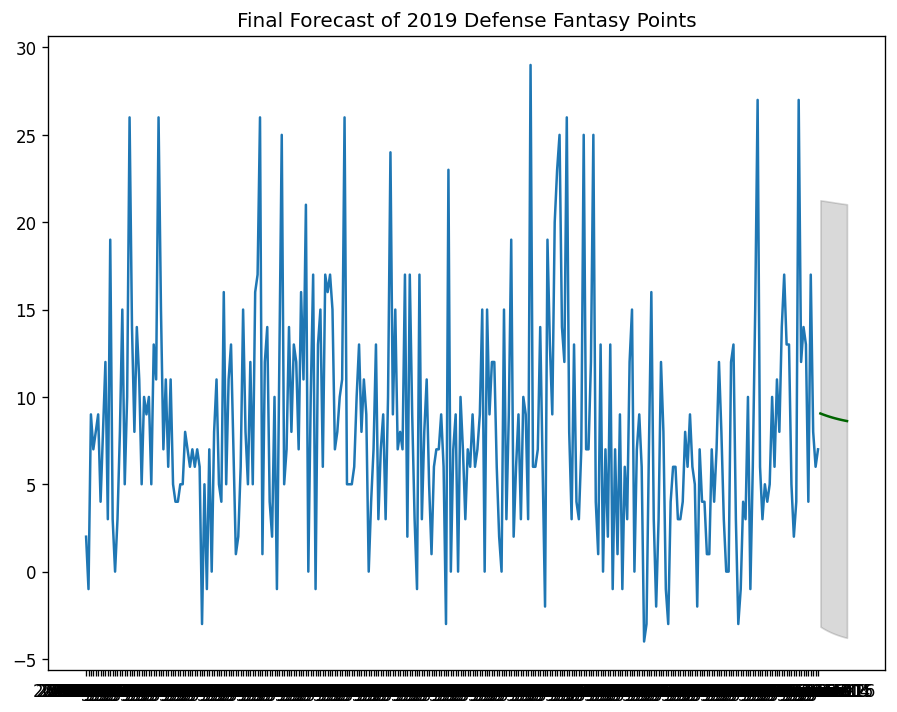

In [8]:
# Forecast
n_periods = 12
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df[1]), len(df[1])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df[1])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of 2019 Defense Fantasy Points")
plt.show()

In [9]:
fc_series

304    9.051353
305    8.997700
306    8.947466
307    8.900433
308    8.856397
309    8.815167
310    8.776564
311    8.740421
312    8.706581
313    8.674898
314    8.645233
315    8.617458
dtype: float64

In [10]:
fc_series.sum()

105.72967454553694